In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [12]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 2
t = 1000
d = 2
to_d = 10
a = 1

In [13]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 3.14159265])

In [14]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [x, y]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

def rotation(data, seed = 42, d = to_d):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    random_rotation_matrix = special_ortho_group.rvs(to_d)
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

In [15]:
data = np.zeros((c, d, t))

In [16]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[np.float64(1.0), np.float64(0.0)]
[np.float64(-1.0), np.float64(1.2246467991473532e-16)]


In [17]:
for i in range(t):
    if i == 0:
        continue
    data[:, :, i] = data[:, :, i - 1] * 1.002 + np.random.normal(0, 0.01, (c, d))

Text(0.5, 0, 'Time')

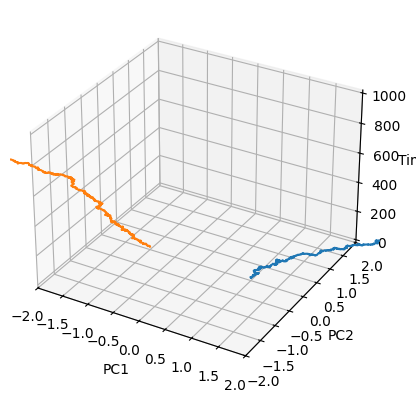

In [18]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(data[i, 0, :], data[i, 1, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')



In [19]:
print(data[0, :, 0])

[1. 0.]


In [20]:
new_data = transformation_to_n_dim(data, d, to_d)
new_data.shape

(2, 10, 1000)

In [21]:
new_data[0, :, 2]

array([1.00119624, 0.00112375, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [22]:
rotated = rotation(new_data)

In [23]:
rotated.shape

(2, 10, 1000)

In [24]:
rotated[0, :, 2]

array([-0.48498925, -0.36382945,  0.14525898,  0.24971355,  0.17396223,
       -0.43136509, -0.09464817,  0.17713846,  0.54106925,  0.04382635])

Text(0.5, 0, 'Time')

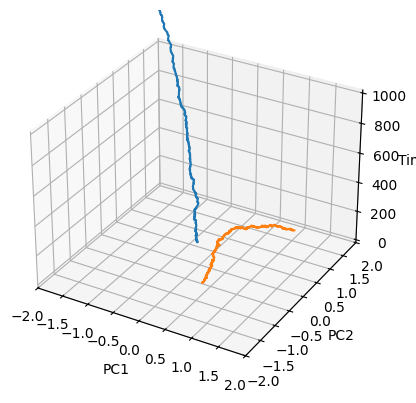

In [25]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(rotated[i, 1, :], rotated[i, 8, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')


Text(0.5, 0, 'Time')

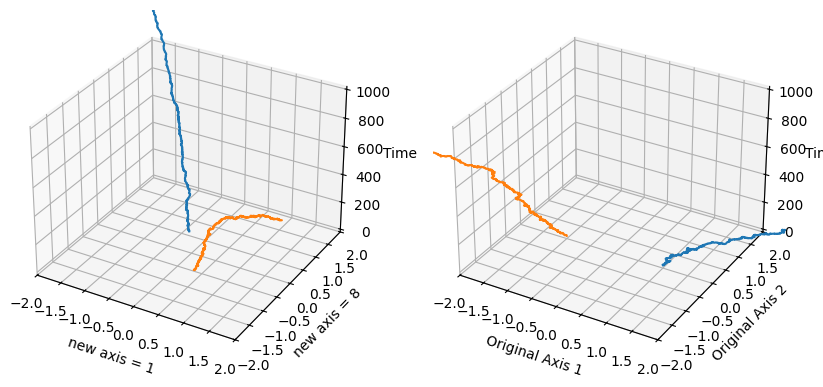

In [26]:
rotated_axis_a = 1
rotated_axis_b = 8

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# ax[0] = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax[0].plot(rotated[i, rotated_axis_a, :], rotated[i, rotated_axis_b, :], range(t))

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('new axis = ' + str(rotated_axis_a))
ax[0].set_ylabel('new axis = ' + str(rotated_axis_b))
ax[0].set_zlabel('Time')

# ax[1] = plt.figure().add_subplot(projection='3d')
for i in range(c):
    ax[1].plot(data[i, 0, :], data[i, 1, :], range(t))

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original Axis 1')
ax[1].set_ylabel('Original Axis 2')
ax[1].set_zlabel('Time')


Text(0.5, 0, 'Original axis 1-2')

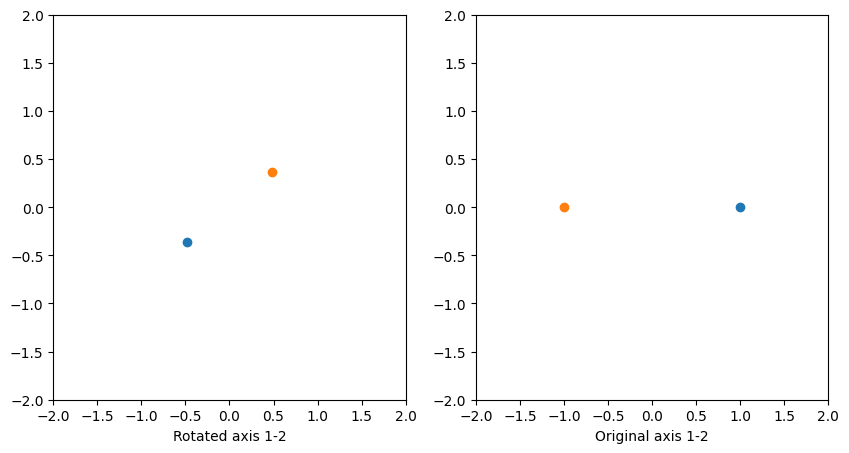

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(c):
    ax[0].scatter(rotated[i, 0, 0], rotated[i, 1, 0])
    ax[1].scatter(data[i, 0, 0], data[i, 1, 0])

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('Rotated axis 1-2')

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original axis 1-2')

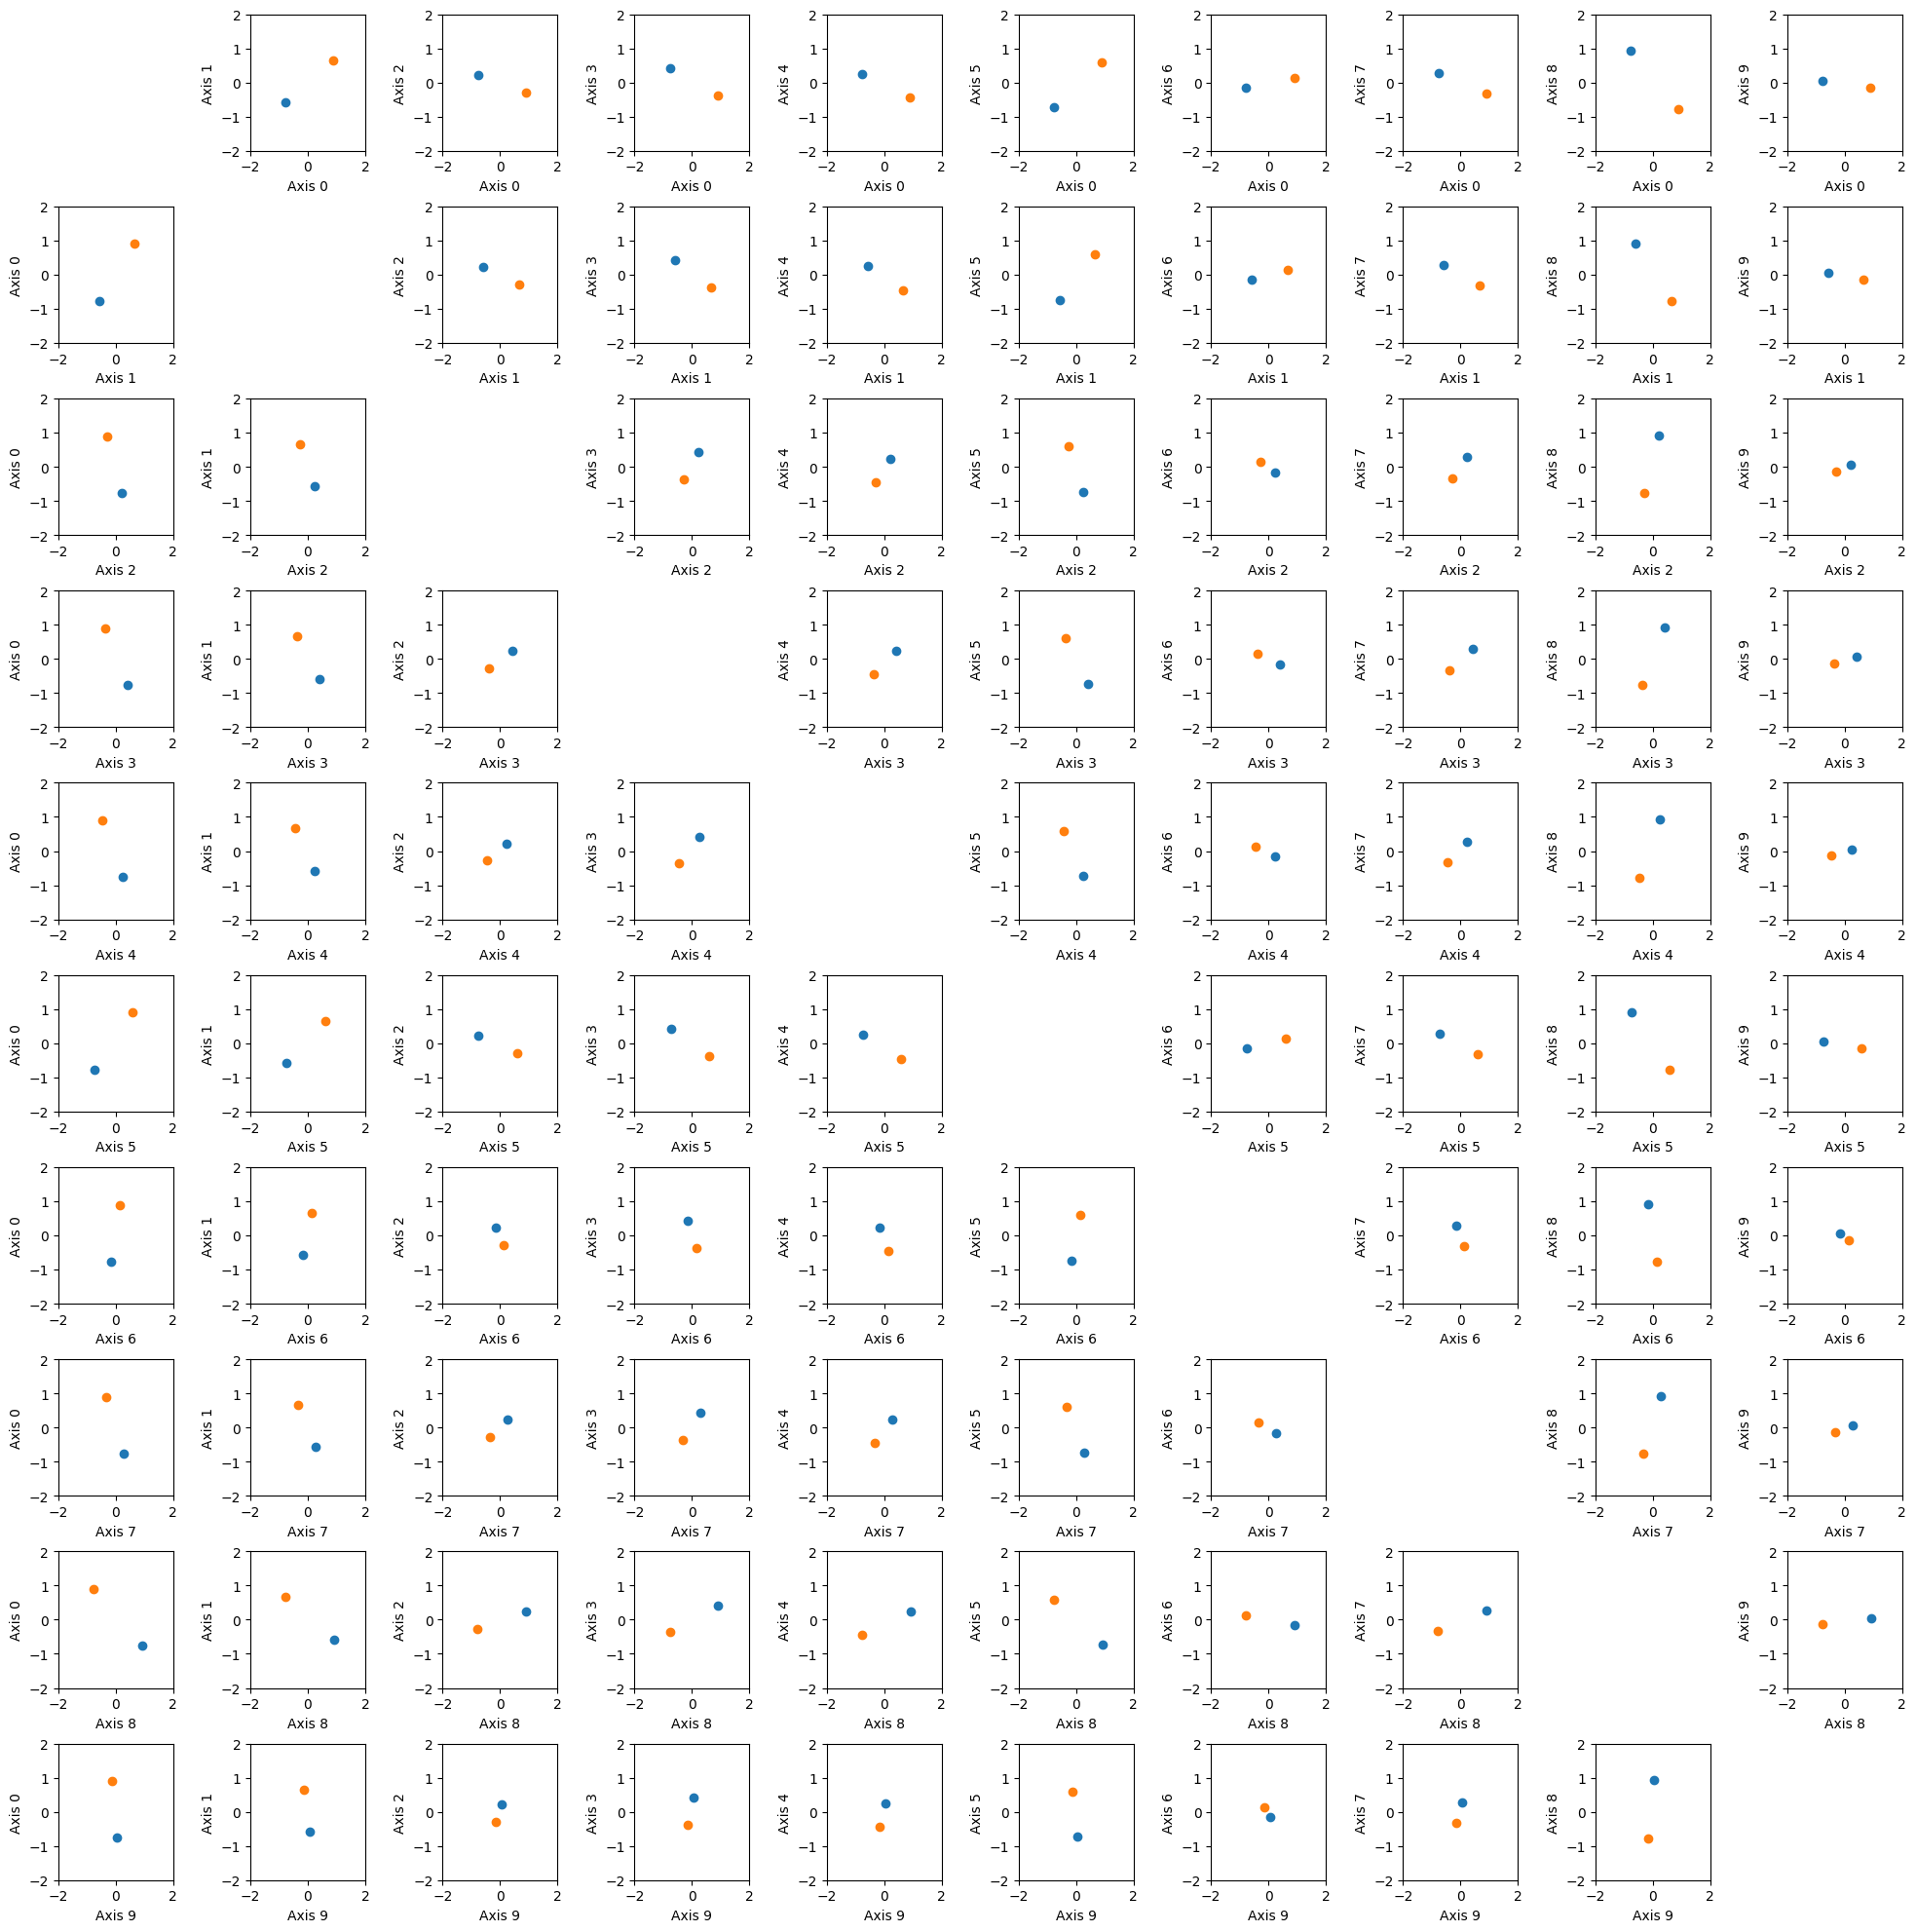

In [29]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=2.0)

inspect_time = 200

for i in range(10):
    for j in range(10):
        for c in range(2):
            if i != j:
                ax[i, j].scatter(rotated[c, i, inspect_time], rotated[c, j, inspect_time])
                ax[i, j].set_xlim([-2, 2])
                ax[i, j].set_ylim([-2, 2])
                ax[i, j].set_xlabel(f'Axis {i}')
                ax[i, j].set_ylabel(f'Axis {j}')
            else:
                ax[i, j].axis('off')  # Turn off the diagonal subplots

plt.show()

In [30]:
np.save('explode-rotated.npy', rotated)

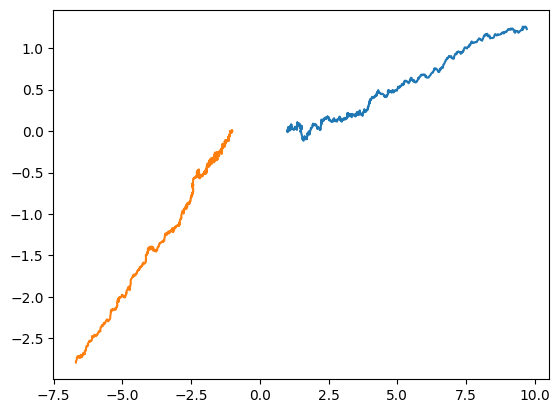

In [32]:
for i in range(2):
    plt.plot(data[i, 0, :], data[i, 1, :])